# Homework 2: Identifying Illegal Coffee Plantations

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 3rd, 11:59pm Kigali time.


***Team Members:*** 
DUSENGEYEZU LONGIN AND UYISABYE VALENTINE

**IDs**: 220020609 AND 221000259

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.regularizers import l1_l2
import matplotlib
import matplotlib.pylab as plt
from google.colab import files

# Loading Competition Data
Run all the steps below to obtain the data

**1. Introduction**

Illegal coffee plantations are often located deep in the forest, they are difficult to detect. Therefore, satellite images are now being used to detect these plantations. However, there are vast numbers of satellite images being collected and it is both expensive and inefficient to process these images using human experts.

Our task is to build a machine learning model that can automatically detect the presence of a coffee plantation in a satellite image. we are provided with a small training set of labeled images (the label is 1 if there is a coffee plantation in the image, and the label is 0 if there is not). 

In [ ]:
# Read training data images
X = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_train.txt') # read in the data as a DataFrame
X.shape # show the shape of the dataset

(1440, 400)

In [ ]:
# Reshape the X's to have the correct dimensionality
X = X.reshape(X.shape[0], 20, 20)
print(X.shape)

(1440, 20, 20)


In [ ]:
# Read training data labels
y = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/y_train.txt')
y.shape # show the shape of the labels

(1440,)

# Now we are done with downloading data! 
* Try building a model inside this notebook by create additional cells below with code to specify and fit the model
* If you are fitting large neural nets, make sure this google colab notebook is running on GPUs
* Check Edit --> Notebook settings --> Hardware accelerator: GPU

In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

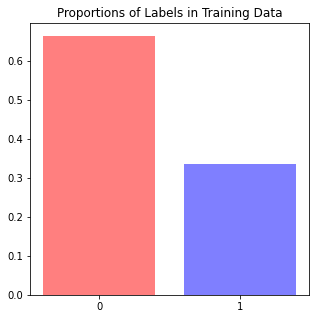

In [ ]:
# Make a bar chart showing the proportions of 0 labels and 1 labels in the training set
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Percentage of training data labeled 0
percent_0 = len(y_train[y_train == 0]) * 1. / len(y_train)
# Percentage of training data labeled 1
percent_1 = len(y_train[y_train == 1]) * 1. / len(y_train)
# Plot percentages in a bar plot
ax.bar((0, 1), (percent_0, percent_1), color=['red', 'blue'], alpha=0.5, align='center')
# Prettify the plot
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

In [ ]:
# Construct a Convolutional Neural Network

# Step 1: Set the stride size
stride_size = (2, 2)

# Step 2: Set the pool size
pool_size = (2, 2)

# Step 3: define a sequential object
cnn_model = Sequential()

# Step 4: add a convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=2, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
# second convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=3, padding='same', activation='relu'))
# third convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=3, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
# Fourth convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=3, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
# Fifth convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=3, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
# # sixth convolutional layer 
cnn_model.add(
    Conv2D(10, kernel_size=3, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))

#seventh convolutional layer 
# cnn_model.add(
#     Conv2D(10, kernel_size=3, padding='same', activation='relu',
#            input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
# ))
# # # eight convolutional layer 

# cnn_model.add(
#     Conv2D(10, kernel_size=3, padding='same', activation='relu',
#            input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
# ))



# Step 5: add a max pooling layer
cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))

# Step 6: flatten
cnn_model.add(Flatten())

# Step 7: add a dense layer

cnn_model.add(Dense(60, activation='tanh', kernel_regularizer=l1_l2(0.001,0.001)))

# Step 8: use sigmoid activation to output a probability
cnn_model.add(Dense(1, activation='sigmoid'))

# Step 8: select the learning rate
lr = 0.007

# Step 10: Compile model 
cnn_model.compile(optimizer=SGD(lr=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


A convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery and also it is a special type of Neural Network used effectively for image recognition and classification. For our task we are using this convolution neural network to detect the place where there is a coffee plantation and the place where there is no coffee plantation

We are using 6 convolution layer,for each convolution layer we create 10 nodes, kernel size of 3. We used relu non-linearity as activation. We also enable padding equal to same . And also we use the learning rate which is equal to 0.0007

we used one dense layer and 50 nodes, net elastic regularisation which combine l1 and l2 at the same time to reduce overvitting, we used sigmoid action as binary classifier.

**By fitting our model well we are removing class imbalance by using class weight to remove it then we are using 150 batch_size and 300 epochs.**

In [ ]:
# Fit the model
history = cnn_model.fit(np.expand_dims(X_train, axis=-1), y_train, batch_size=150, class_weight={1:5,0:10}, epochs=300, verbose=0)

**By fitting our model well we are removing class imbalance by using class weight to remove it then we are using 150 batch_size and 300 epochs.**

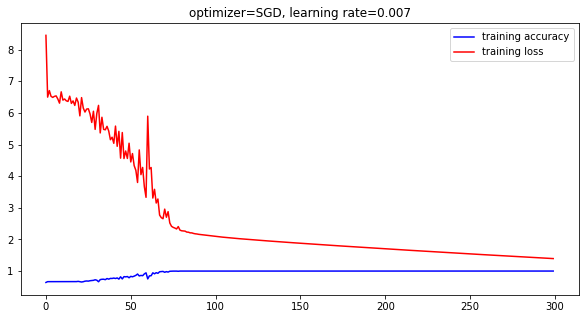

In [ ]:
# Plot the loss function and the evaluation metric over the course of training
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.array(history.history['accuracy']), color='blue', label='training accuracy')
ax.plot(np.array(history.history['loss']), color='red', label='training loss')
ax.set_title('optimizer={}, learning rate={}'.format('SGD', lr))
ax.legend(loc='upper right')
plt.show()

**By ploting loss function and  evaluating metric over the course of training, we can conclude that  our model is better as our training loss converges and training accuracy  is better**

In [ ]:
# Step 1: make prediction on test data
y_pred = cnn_model.predict(np.expand_dims(X_test, axis=-1))
y_pred_tr = cnn_model.predict(np.expand_dims(X_train, axis=-1))
# Step 2: threthold the output probabilities
y_pred = (y_pred >= 0.5) * 1.0

y_pred_tr = (y_pred_tr >= 0.5) * 1.0

# Step 3: print the confusion matrix
print('Confusion Matrix train:')
print(confusion_matrix(y_train, y_pred_tr))

print('Confusion Matrix test:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix train:
[[718   0]
 [  0 362]]
Confusion Matrix test:
[[224  18]
 [ 64  54]]


**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

**In our model this confusion matrix shows that the true negative rate is 94.8% ,false positive rate is 0.51%, false negative rate is 31.25% and true positive rate is 68.75%**

**This means that our model predicts that 94.8 percent we have no coffee plantation and actually is reality. It also predicts that at 68.75 percent we have coffee plantation which is actually  reality.**

### Evaluate your predictions using the macro-F1 score

**The F1 Score is a measure of a test's accuracy ,that conveys the balance between the precision and the recall.**

In [ ]:
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_train, y_pred_tr, average='macro'))

0.7068520357497516
1.0


**Conclusion**

The convolution neural network is best classifier to classify image, in this task of classifying no coffee plantantion and coffee plantation in forest, It classifies perfectly well where there is coffee plantation and where there is no coffee plantation at 99.47 % at training set and at 83.31 % at test set. Even though we have little overfitting, it is still best classifier, we therefore recommend convolutional neural network to be used in Image classification.

# Use your model to predict on the test data, create a submission file
Your submission file should follow the Kaggle submission template.


In [ ]:
# Read training data images
X_holdout = pd.read_csv('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_test_df.csv') # read in the data as a DataFrame
X_holdout.shape # show the shape of the dataset

(476, 401)

In [ ]:
X_holdout = X_holdout.values[:, 1:]

# Reshape the X's to have the correct dimensionality
X_holdout = X_holdout.reshape(X_holdout.shape[0], 20, 20)
print(X_holdout.shape)

(476, 20, 20)


In [ ]:
# Save your predictions to a DataFrame
my_predictions = cnn_model.predict(np.expand_dims(X_holdout, axis=-1))
# Step 2: threthold the output probabilities
my_predictions = (my_predictions >= 0.5) * 1.0


my_submission = pd.DataFrame(np.arange(len(my_predictions)), columns=['index'])
my_submission['label'] = my_predictions.astype(int)

# Save submission file
my_submission.to_csv('my_submission.csv', index=None)

# Save and download the submission file and upload to the Kaggle website

Then download `my_submission.csv` by running the following line and submit to the [Kaggle](https://www.kaggle.com/t/b9bc778c9e8842d28c5526f578e6c348) compeition website.

In [ ]:
files.download('my_submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>